# Case Study 1: Churn Analysis

** Churn Analysis in Telecommunication: **

A customer can be called as a “churner” when he/she discontinue their subscription in a company and move their business to a competitor. Prediction as well as prevention of customer churn brings a huge additional revenue source for every business.

Here, we use a telecom customer data set to classify the set of possible customers who are likely to churn. 

** The dataset is available at http://www.dataminingconsultant.com/data/churn.txt **

In [43]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data Loading

** To start with data loading, import the required python package and load the downloaded csv file. The data can be stored as dataframe for easy data manipulation/analysis. Pandas is one of the most widely used library for the same. **

In [44]:
churn = pd.read_csv('01 churn.txt')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


# Data Analysis

** Analysis of data is a must in any classification problem. The goal of data analysis is to derive useful information from the given data for decision making. In this section, we will analyse our dataset in terms of size, headers, view data summary and a sample data. **

In [45]:
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [46]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Target Identification

** Target is the class/category to which the data will be assigned. In our case, the aim is to identify whether the customer will churn or not. **

In [47]:
churn_target=churn['Churn?'] 

# Feature Identification

** In any classification problem, identifying the right features plays a major role. So, how do we identify the features(columns) that influence the prediction. **

In [48]:
churn_feature = churn.drop(['Phone','Churn?'],axis=1)

# Categorical Data

** Convert to boolean: **
The 'yes'/'no' type categorical variables can be converted to boolean values( True/False). The Numpy array package in python will automatically convert it to 1 or 0. In our example,the columns Int'l Plan,VMail Plan are categorical variables with yes/no values.

** Label Encoding: **
Label encoding is a technique used to map non-numerical labels to numerical labels. The numerical values are encoded with values ranging from 0 : N (no of unique labels).

** One Hot Encoding: **
One Hot Encoding / Dummy Coding is one of the preprocessing technique that maps the categorical features onto a set of columns that has values 1 or 0 to represent the presence or absence of that feature.

In [49]:
churn_categorical = churn.select_dtypes(include=[object])

yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feature[yes_no_cols] = churn_feature[yes_no_cols] == 'yes'

label_encoder = preprocessing.LabelEncoder()
churn_feature['Area Code'] = label_encoder.fit_transform(churn_feature['Area Code'])

churn_dumm=pd.get_dummies(churn_feature, columns=["State"], prefix=["State"])
churn_matrix = churn_dumm.as_matrix().astype(np.float)

# Missing Values

** In our dataset, we do not have any missing values. This might not be the case always. Inorder to demonstrate how to deal with such cases, here is a code snippet: **

In [50]:
#Missing values replaced by mean
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#Fit to data, then transform it.
churn_matrix=imp.fit_transform(churn_matrix)

# Standardization

** Standardization is a technique for re-scaling variable to a mean of zero and standard deviation of one. It is used to transform the data to its center by ignoring the shape of the distribution. **

In [51]:
#Standardize the data by removing the mean and scaling to unit variance
scaler = StandardScaler()
#Fit to data, then transform it.
churn_matrix = scaler.fit_transform(churn_matrix)

# Train and Test Data

In [52]:
seed=7 
train_data,test_data, train_label, test_label = train_test_split(churn_matrix, churn_target, test_size=.1,random_state=seed)

# Decision Tree Classification

* It is one of the commonly used classification technique for performing binary as well as multi class classification.
* The decision tree model predicts the class/target by learning simple decision rules from the features of the data.

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=seed)
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('Decision Tree Classifier : ',score)

Decision Tree Classifier :  0.910179640719


# Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('Naive Bayes : ',score)

Naive Bayes :  0.574850299401


# Stochastic Gradient Descent Classifier

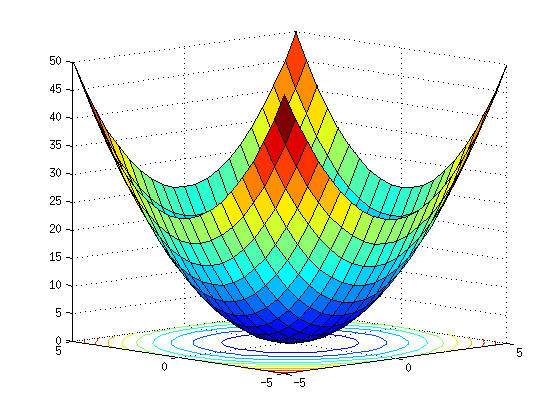

* Used for large scale learning
* Supports different loss functions & penalties for classification

In [55]:
from sklearn.linear_model import SGDClassifier
classifier =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=seed)
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('SGD classifier : ',score)

SGD classifier :  0.781437125749


C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


# Support Vector Machine

** Support Vector Machine (SVM) is effective in:**
* High-dimensional spaces
* In cases, where, the number of dimensions > the number of samples
* In cases with a clear margin of separation

In [56]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", C=0.025,random_state=seed)
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('SVM Classifier : ',score)

SVM Classifier :  0.847305389222


# Random Forest Classifier

** Controls over fitting. A random forest fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy**

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10,random_state=seed)
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('Random Forest Classifier : ',score)

Random Forest Classifier :  0.868263473054


# Model Tuning

* The classification algorithms in machine learning are parameterized. Modification of any of those parameters can influence the results. So algorithm/model tuning is very essential to find out the best model.
* For example, lets take Random Forest Classifier and change the values of few parameters (n_ estimators,max_ features)

In [58]:
classifier = RandomForestClassifier(max_depth=5, n_estimators=15, max_features=60,random_state=seed)
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score=classifier.score(test_data, test_label)
print('Random Forest classification after model tuning',score)

Random Forest classification after model tuning 0.937125748503


# Performance Evaluation Measures

** Classification Accuracy: **
The classification accuracy is defined as the percentage of correct predictions.

** Confusion Matrix: **
It is a technique used to evaluate the performance of a classifier. It visually depicts the performance in a tabular form that has 2 dimensions namely “actual” and “predicted” sets of data.

** Classification Report: **
The classification_report function shows a text report showing the commonly used classification metrics.

* Precision: When a positive value is predicted, how often is the prediction correct?
* Recall It is the true positive rate. When the actual value is positive, how often is the prediction correct?

In [59]:
# Classification Accuracy
print('Accuracy Score',accuracy_score(test_label,churn_predicted_target)) 

# Confusion Matrix
print('\n Confusion Matrix \n',confusion_matrix(test_label,churn_predicted_target))

# Classification Report
target_names = ['False.', 'True.']
print('\n',classification_report(test_label, churn_predicted_target, target_names=target_names))

Accuracy Score 0.937125748503

 Confusion Matrix 
 [[276   7]
 [ 14  37]]

              precision    recall  f1-score   support

     False.       0.95      0.98      0.96       283
      True.       0.84      0.73      0.78        51

avg / total       0.93      0.94      0.94       334

